# Q1

## Q1-1

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)
iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
import pandas_profiling as pp
report = pp.ProfileReport(iris)

report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})

PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())

RANDOM_STATE = 44

In [4]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)


def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(x, y, z, c=iris['species'], cmap=CMAP, s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    
    legend = ax.legend(*scatter.legend_elements(), title="Species")
    ax.add_artist(legend)


### plotting first two feature

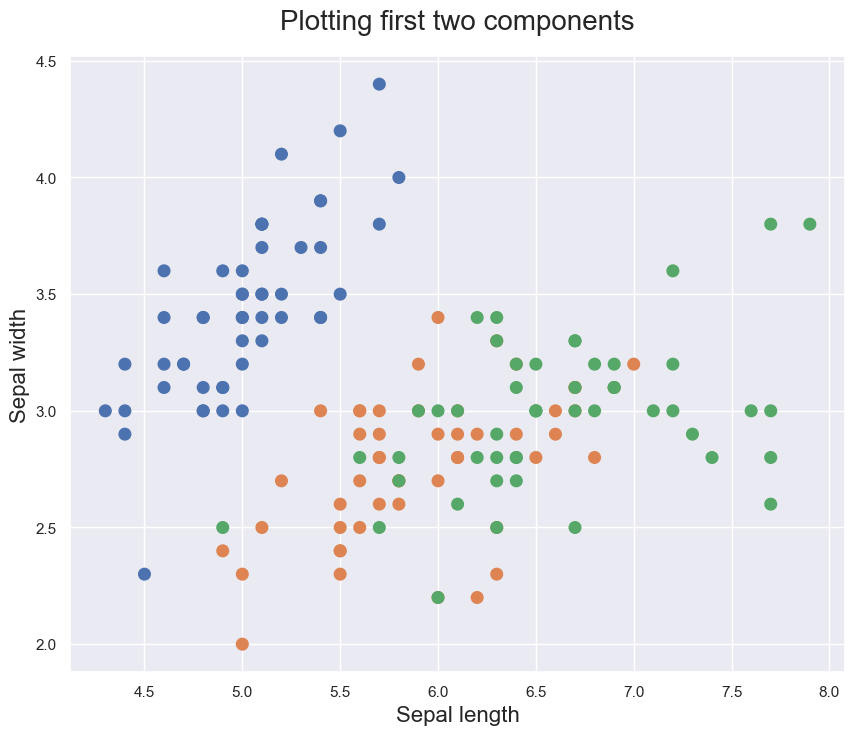

In [5]:
plot_iris_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

### 2D plotting with PCA

In [6]:
pca = PCA(n_components=2)
points = pca.fit_transform(iris[features])

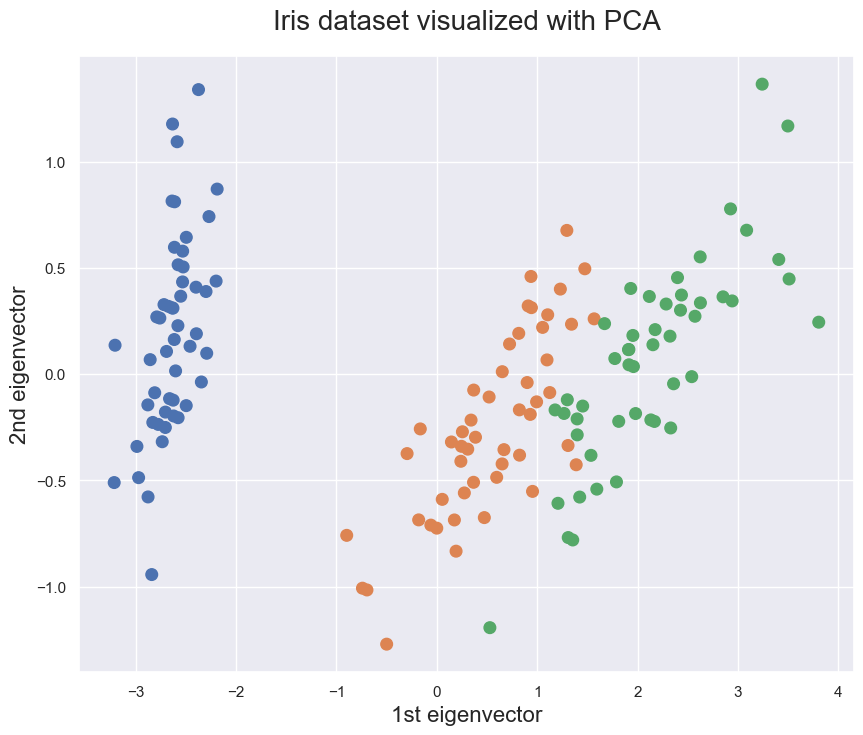

In [7]:
plot_iris_2d(
    x = points[:,0],
    y = points[:,1],
    title = 'Iris dataset visualized with PCA')

### 2D plotting with t-SNE

In [8]:

tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

d:\App\Anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


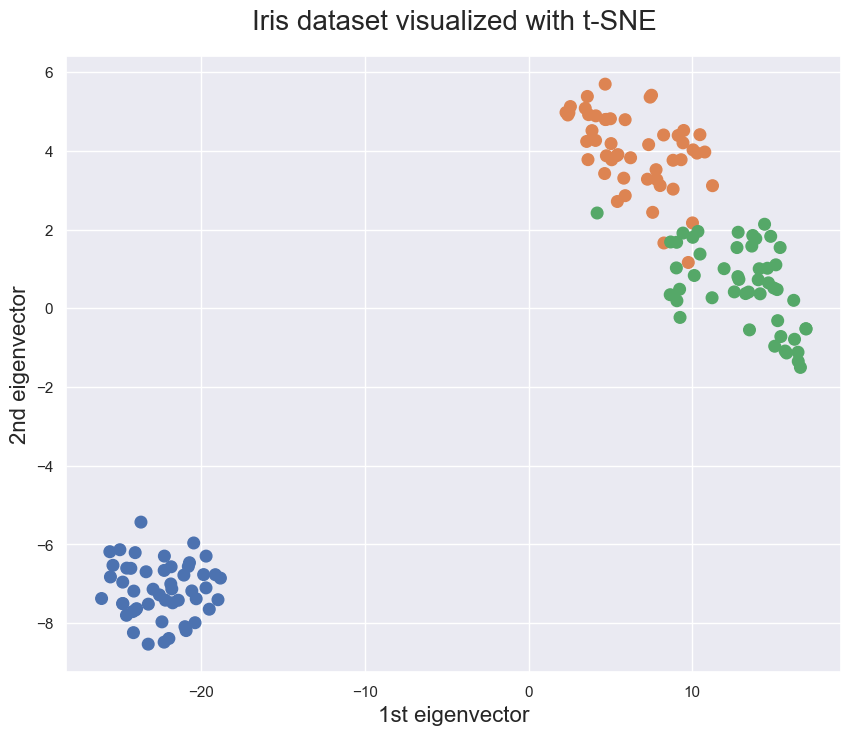

In [9]:
plot_iris_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'Iris dataset visualized with t-SNE')

### 3D Plotting with PCA

In [10]:
pca = PCA(n_components=3)
points = pca.fit_transform(iris[features])

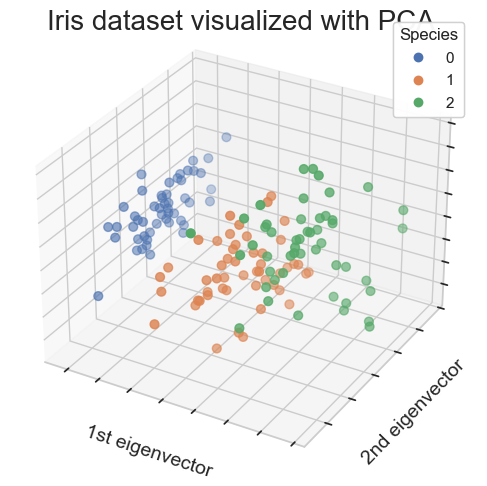

In [11]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with PCA")
plt.show()

### 3D plotting with t-SNE

d:\App\Anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


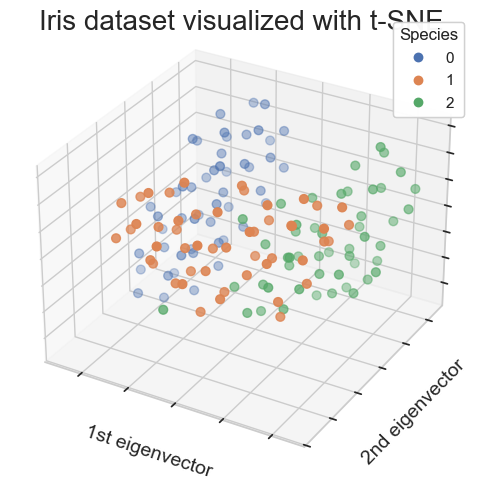

In [12]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with t-SNE")

## Q1-2

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris[features], iris['species'], test_size=0.2, random_state=44)
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



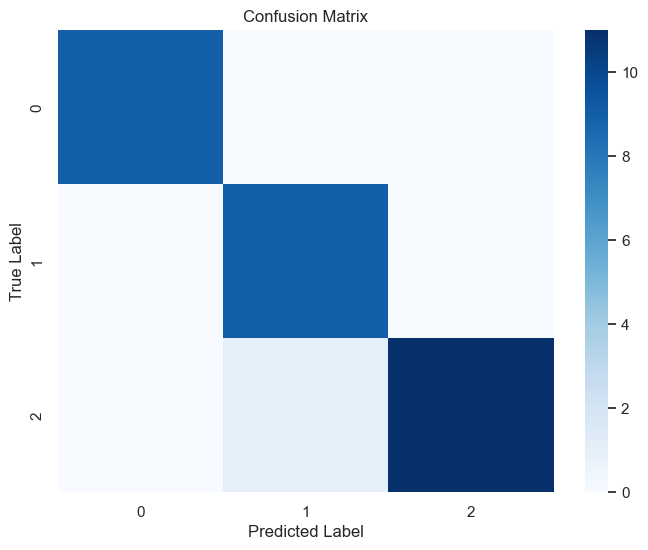

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_linear = SVC(kernel='linear', random_state=44)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
label_names = iris['species'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm,fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print('weights : ',svm_linear.coef_[0] , 'bias : ',svm_linear.intercept_[0])

weights :  [-0.17011404  0.48114532 -0.62212763 -0.72763817] bias :  -0.7924655222232578


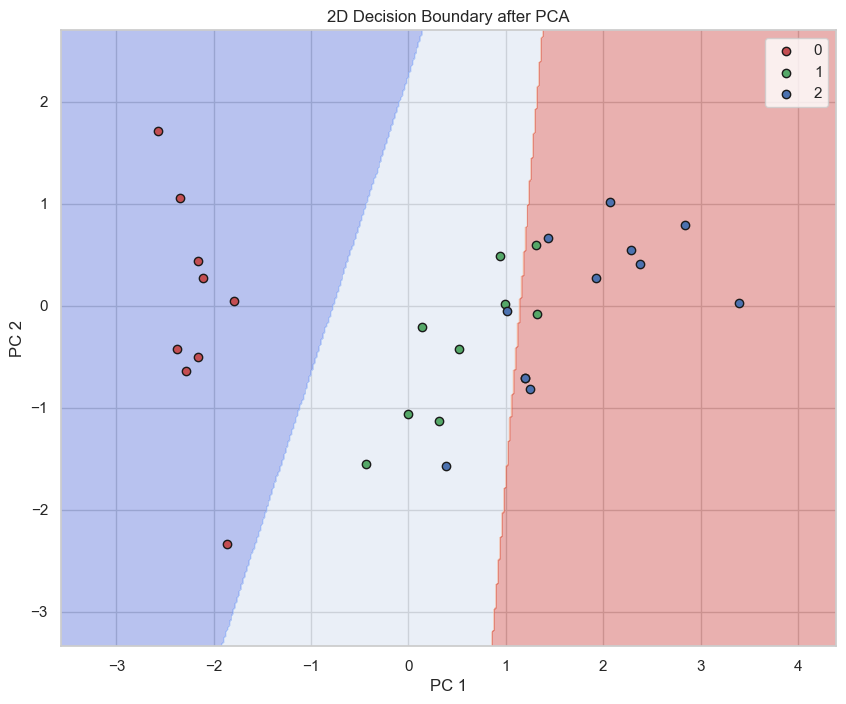

In [47]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_linear.fit(X_train_pca, y_train)

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

colors = ['r', 'g', 'b']
target_names = iris['species'].unique()
for i, color in zip(range(len(target_names)), colors):
    idx = np.where(y_test == i)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], c=color, label=target_names[i], edgecolors='k')

plt.title('2D Decision Boundary after PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

## Q2-3

degree 1, Accuracy = 0.97
degree 2, Accuracy = 0.70
degree 3, Accuracy = 0.83
degree 4, Accuracy = 0.67
degree 5, Accuracy = 0.80
degree 6, Accuracy = 0.63
degree 7, Accuracy = 0.80
degree 8, Accuracy = 0.63
degree 9, Accuracy = 0.77
degree 10, Accuracy = 0.63


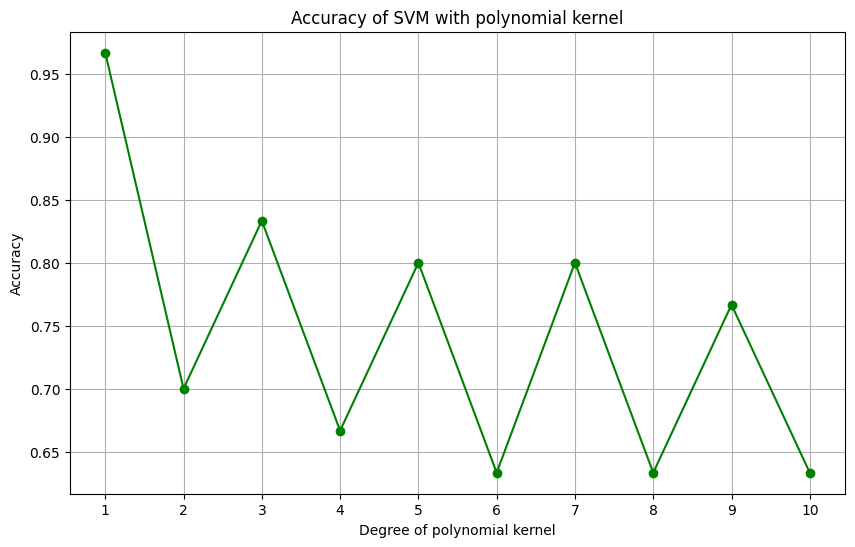

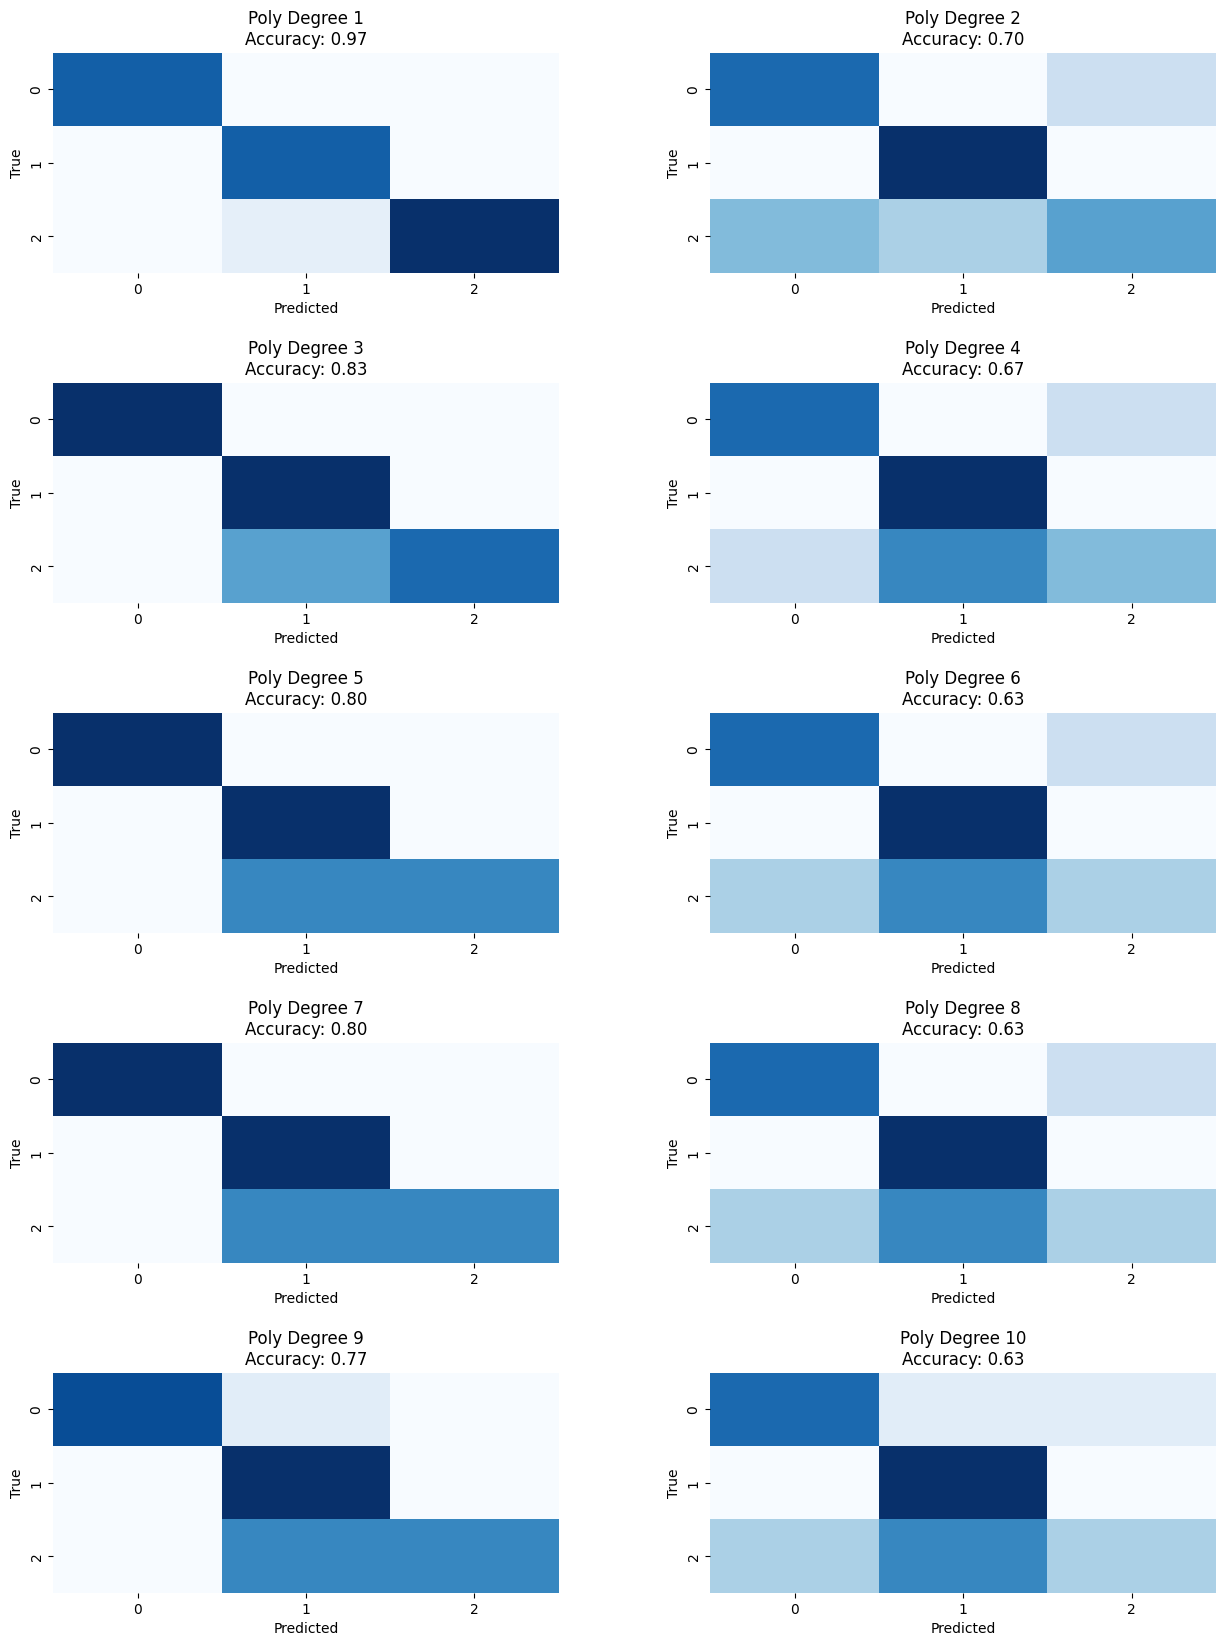

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

classifiers = [SVC(kernel='poly', degree=d, C=0.7) for d in range(1, 11)]

accuracies = []
degrees = range(1, 11)
conf_matrices = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

for degree, accuracy in zip(degrees, accuracies):
    print(f'degree {degree}, Accuracy = {accuracy:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(degrees, accuracies, marker='o', linestyle='-', color='g')
plt.title('Accuracy of SVM with polynomial kernel')
plt.xlabel('Degree of polynomial kernel')
plt.ylabel('Accuracy')
plt.xticks(degrees)
plt.grid(True)
plt.show()

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i, (conf_matrix, degree, ax) in enumerate(zip(conf_matrices, degrees, axes.flatten())):
    sns.heatmap(conf_matrix, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Poly Degree {degree}\nAccuracy: {accuracies[i]:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
plt.show()

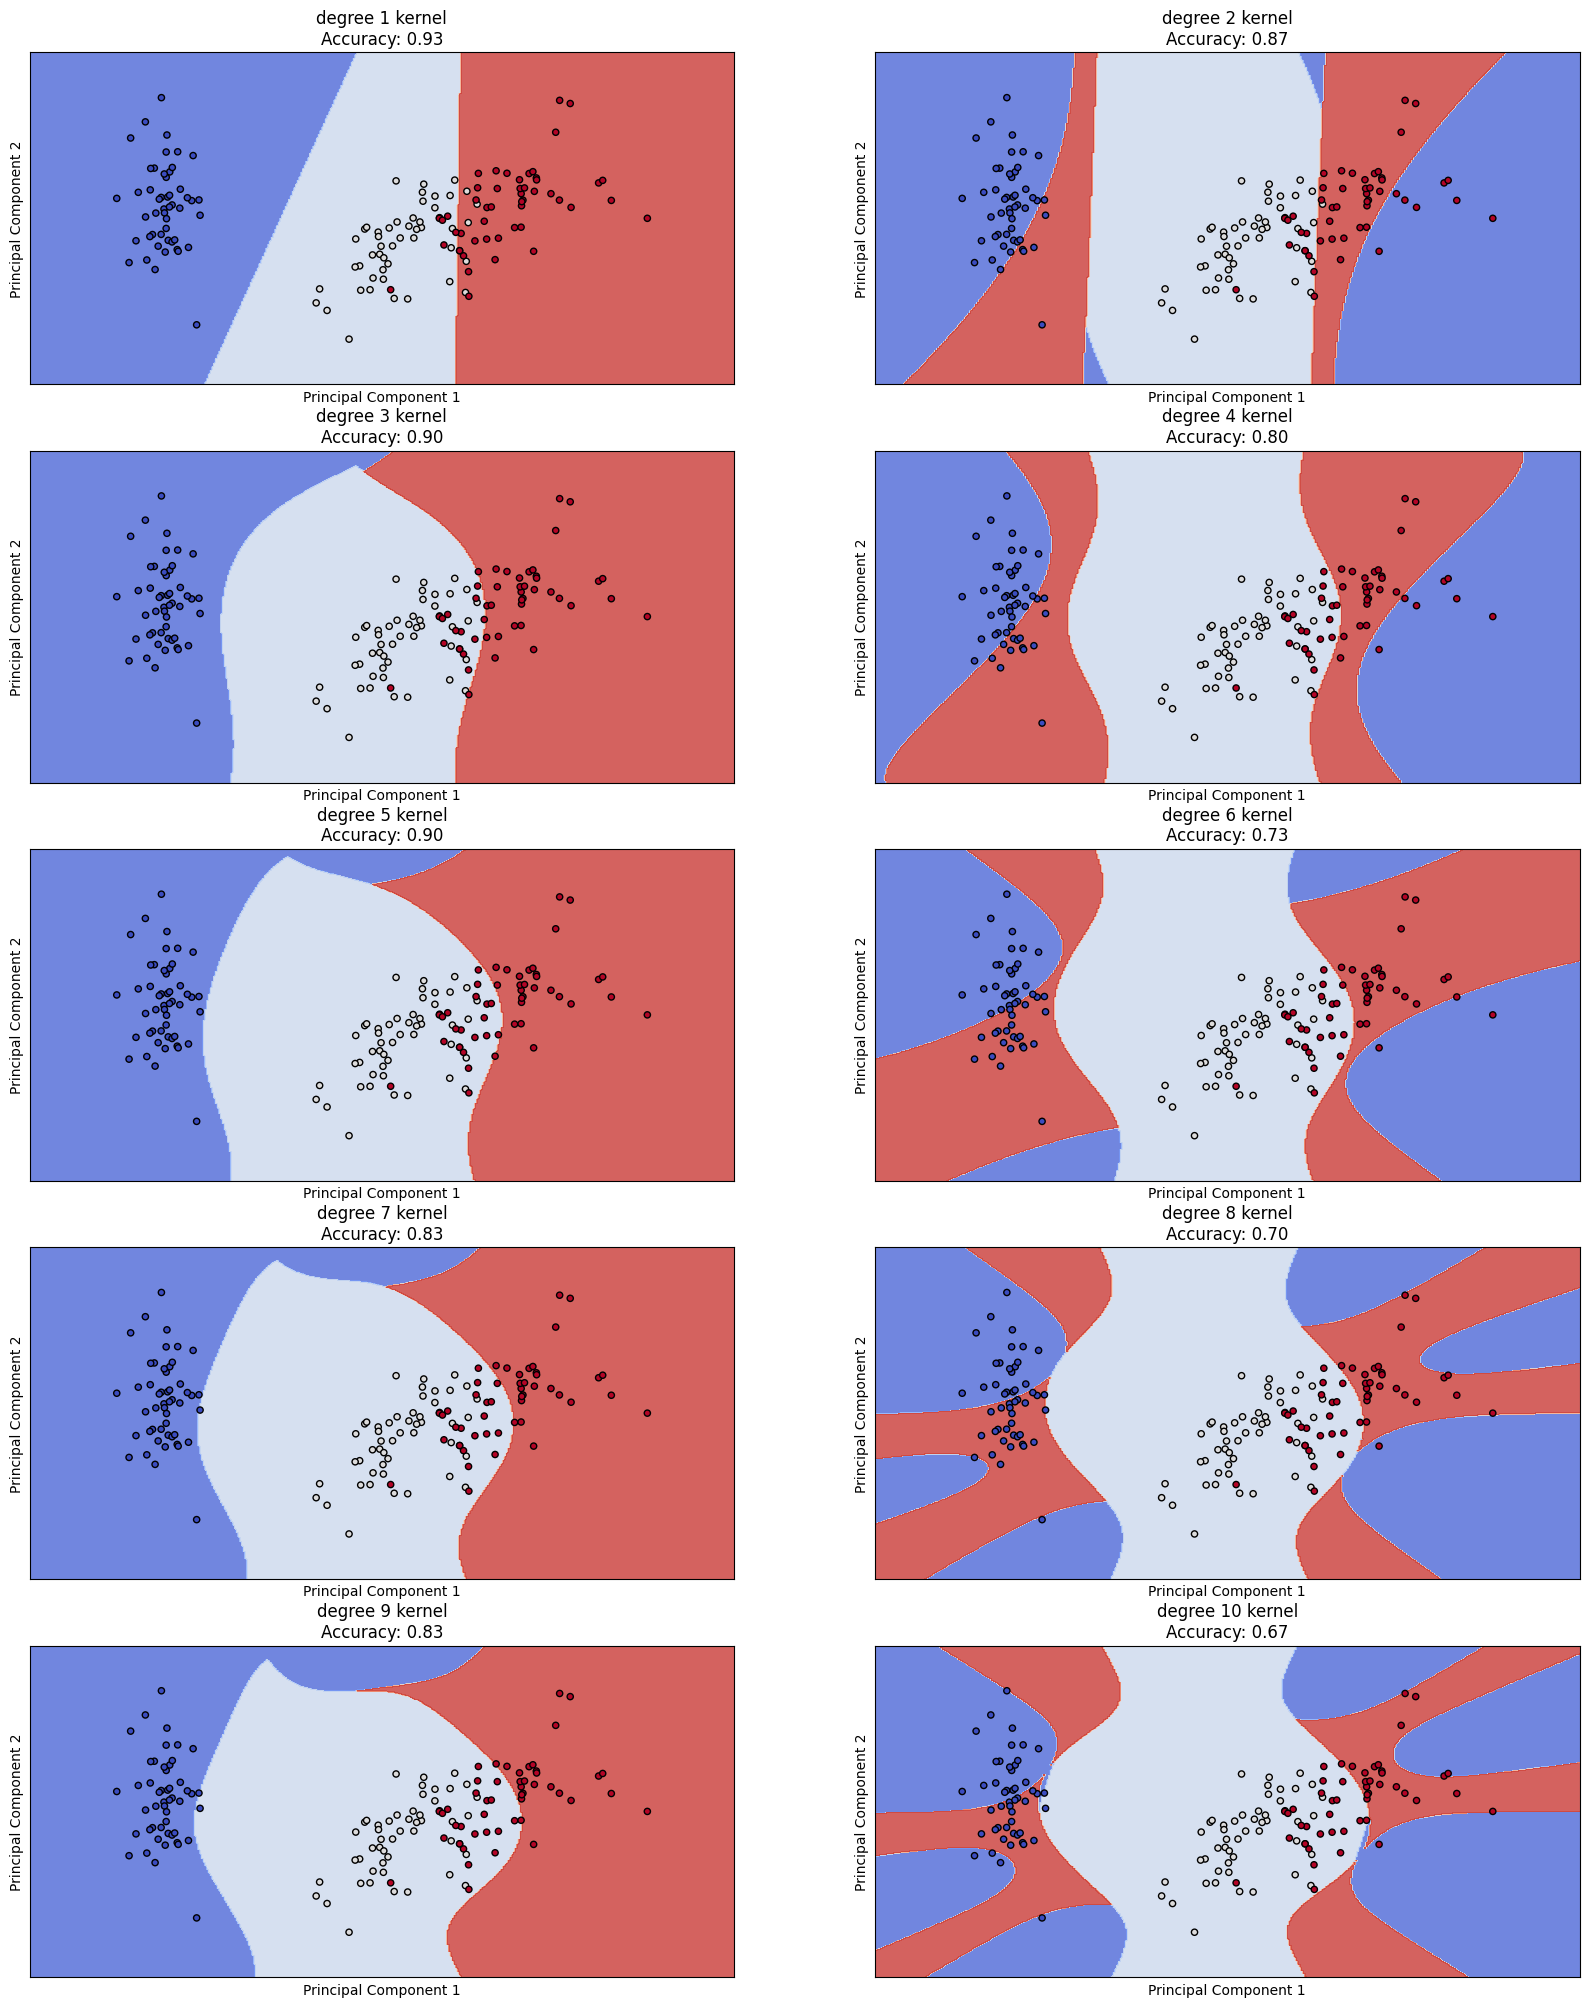

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

X = df_pca[['PC1', 'PC2']].values
y = df_pca['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

classifiers = [SVC(kernel='poly', degree=d, C=0.5) for d in range(1, 11)]

titles = [f'degree {d} kernel' for d in range(1, 11)]

fig, sub = plt.subplots(5, 2, figsize=(20, 25))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

accuracies = []

for clf, title, ax in zip(classifiers, titles, sub.flatten()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"{title}\nAccuracy: {accuracy:.2f}")

plt.show()



In [13]:
import imageio
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from IPython.display import FileLink


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


image_files = []
for degree in range(1, 11):
    clf = SVC(kernel='poly', degree=degree, C=0.5)
    clf.fit(X_train, y_train)

    fig, ax = plt.subplots(figsize=(10, 8))
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'SVC with polynomial (degree {degree}) kernel')

    filename = f"svc_poly_degree_{degree}.png"
    plt.savefig(filename)
    image_files.append(filename)
    plt.close()

images = []
for filename in image_files:
    images.append(imageio.imread(filename))

gif_path = 'Q1.gif'
imageio.mimsave(gif_path, images, duration=2)  

C:\Users\Data\AppData\Local\Temp\ipykernel_8448\3608511686.py:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


## Q1-4

In [15]:
!pip install cvxopt

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
   ---------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
   ---------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
   ---------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
   ---------------------------------------- 0.1/12.8 MB 252.2 kB/s eta 0:00:51
   ---------------------------------------- 0.1/12.8 MB 291.5 kB/s eta 0:00:44
   ---------------------------------------- 0.1/12.8 MB 312.2 kB/s eta 0:00:41
   ---------------------------------------- 0.1/12.8 MB 313.8 kB/s eta 0:00:41
   ---------------------------------------- 0.1/12.8 MB 327.9 kB/s eta 0:00:39
   ---------------------------------------- 0.2/12.8 MB 316.5 kB/s eta 0:00:41
    --------------------------------------- 0.2/12.8 MB 338.5 kB/s eta

In [3]:
import cvxopt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / (len(a)+0.0001)

    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    class_labels = list(set(y))

    classifiers = {}
    w_catch = {}  # catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}

    for i, class_label in enumerate(class_labels):
        binary_y = np.where(y == class_label, 1.0, -1.0)
        w, bias, solution, a, sv_x, sv_y, prediction, kernel_and_params = SVM1(X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = (w, bias, a, sv_x, sv_y, kernel_and_params)
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[label]
            if w is not None:
                decision_scores[:, i] = np.dot(X_t, w) + bias
            else:
                decision_values = np.zeros(X_t.shape[0])
                for j in range(X_t.shape[0]):
                    s = 0
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        if kernel_type == 'linear':
                            s += a1 * sv_y1 * linear_kernel(X_t[j], sv1)
                        elif kernel_type == 'RBF':
                            s += a1 * sv_y1 * gaussian_kernel(X_t[j], sv1, RBF_params)
                        elif kernel_type == 'polynomial':
                            s += a1 * sv_y1 * polynomial_kernel(X_t[j], sv1, poly_params[0], poly_params[1])
                        elif kernel_type == 'sigmoid':
                            s += a1 * sv_y1 * sigmoid_kernel(X_t[j], sv1, sigmoid_params[0], sigmoid_params[1])
                    decision_values[j] = s
                decision_scores[:, i] = decision_values + bias
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers

    return decision_function(X_t)

def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack, epsilon=1e-10):
    plt.figure(figsize=(6, 4))
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            plt.contour(xx, yy, Z, levels=[0], colors='r')

    if trainset:
        plt.title('Data Points')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()


In [6]:
def visualize_multiclass_classification(X, y, kernel_type, classifiers):
    plt.figure(figsize=(20, 10))

    for degree in range(1, 11):
        plt.subplot(2, 5, degree)
        h = .02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = np.zeros((xx.shape[0], xx.shape[1], len(np.unique(y))))
        for i, clf in enumerate(classifiers[degree-1]):
            Z[:, :, i] = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        Z = np.argmax(Z, axis=2)
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title(f'Polynomial Degree {degree}')

    plt.tight_layout()
    plt.show()

Training with polynomial degree 1
Degree: 1, Accuracy: 0.8333333333333334
Training with polynomial degree 2
Degree: 2, Accuracy: 0.9666666666666667
Training with polynomial degree 3
Degree: 3, Accuracy: 0.9666666666666667
Training with polynomial degree 4
Degree: 4, Accuracy: 0.9666666666666667
Training with polynomial degree 5
Degree: 5, Accuracy: 0.9666666666666667
Training with polynomial degree 6
Degree: 6, Accuracy: 0.9666666666666667
Training with polynomial degree 7
Degree: 7, Accuracy: 0.9666666666666667
Training with polynomial degree 8
Degree: 8, Accuracy: 0.9666666666666667
Training with polynomial degree 9
Degree: 9, Accuracy: 0.9666666666666667
Training with polynomial degree 10
Degree: 10, Accuracy: 0.9666666666666667


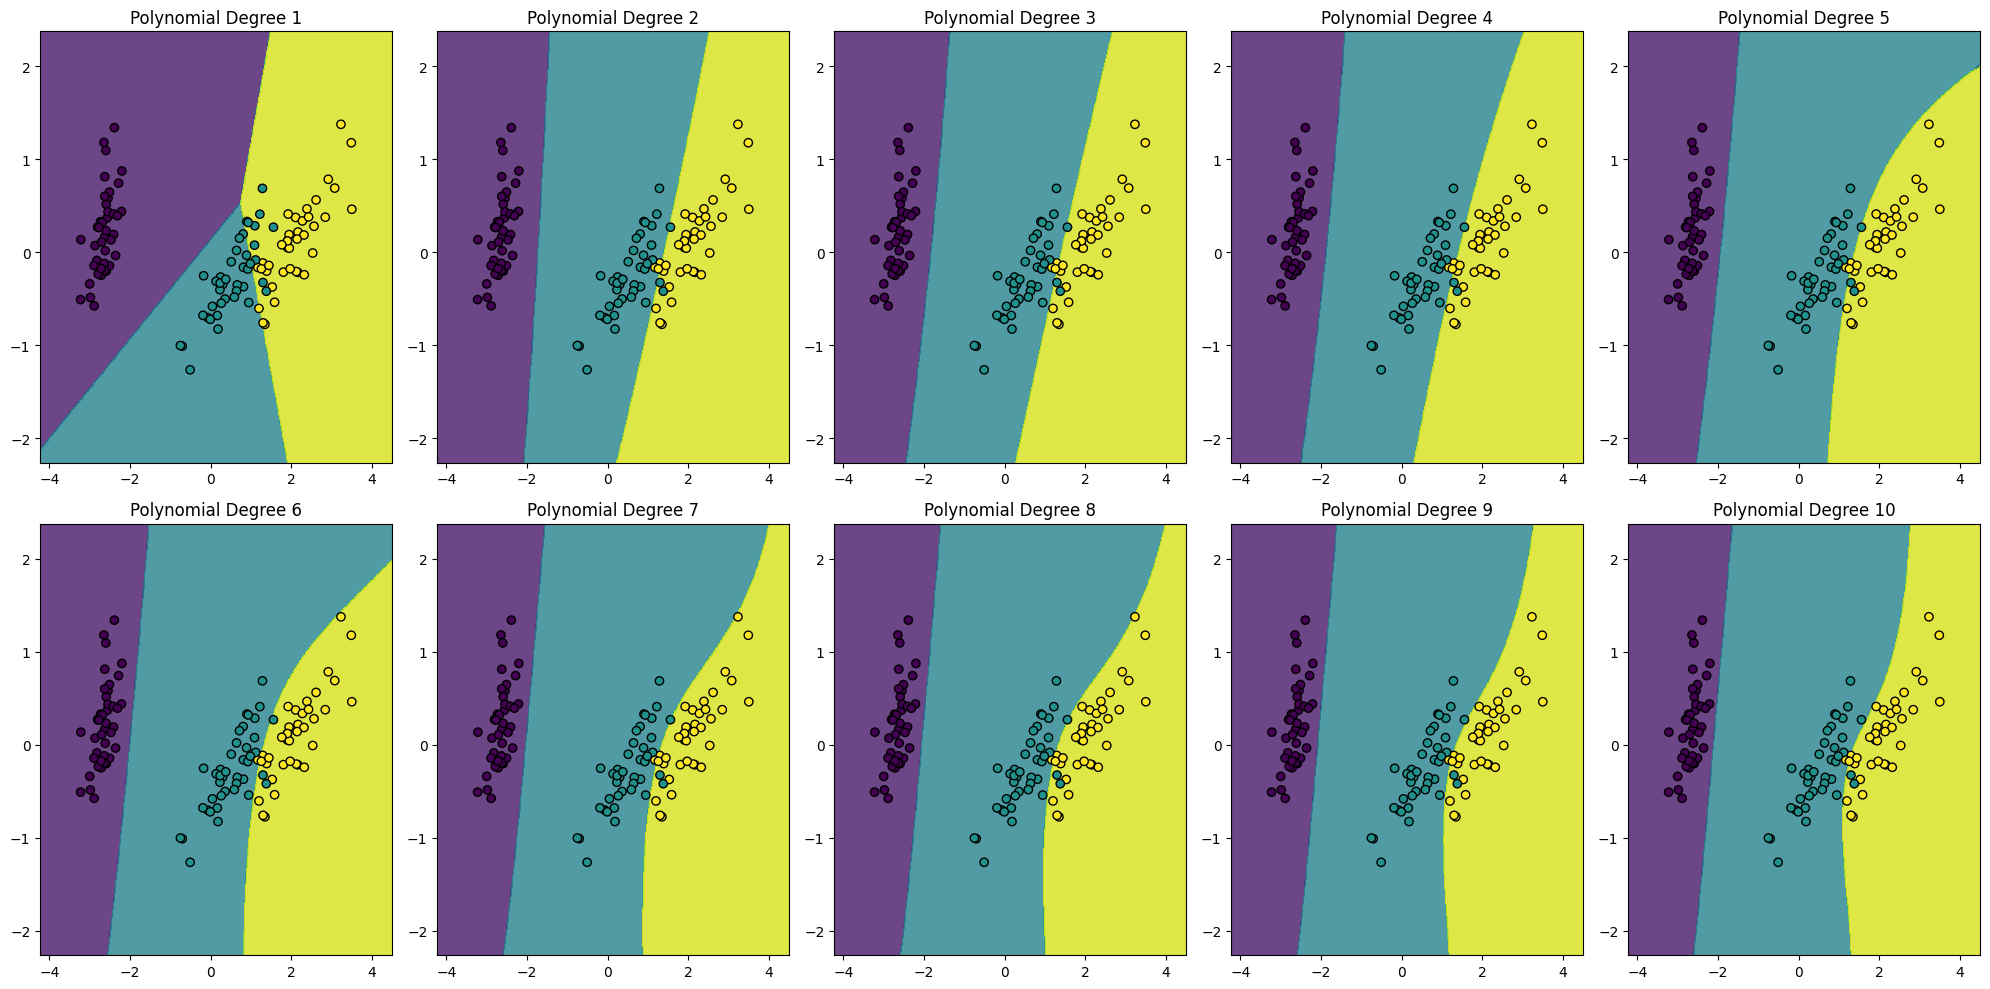

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=44)

# Placeholder for accuracies
accuracies = []

def multiclass_svm(X_train, X_test, y_train, C=1.0, kernel_type='poly', poly_params=(1.0, 2)):
    classifiers = []
    predictions = np.zeros((X_test.shape[0], len(np.unique(y_train))))

    for i, class_label in enumerate(np.unique(y_train)):
        y_train_binary = np.where(y_train == class_label, 1, -1)
        clf = SVC(C=C, kernel=kernel_type, degree=poly_params[1], coef0=poly_params[0])
        clf.fit(X_train, y_train_binary)
        classifiers.append(clf)
        predictions[:, i] = clf.decision_function(X_test)

    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes, classifiers

# Plotting function
def visualize_multiclass_classification(X, y, kernel_type, classifiers):
    plt.figure(figsize=(20, 10))

    for degree in range(1, 11):
        plt.subplot(2, 5, degree)
        h = .02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = np.zeros((xx.shape[0], xx.shape[1], len(np.unique(y))))
        for i, clf in enumerate(classifiers[degree-1]):
            Z[:, :, i] = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        Z = np.argmax(Z, axis=2)
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title(f'Polynomial Degree {degree}')

    plt.tight_layout()
    plt.show()

# Main loop for SVM with polynomial kernel
all_classifiers_iris = []
for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, classifiers = multiclass_svm(
        X_train, X_test, y_train, C=1.0, kernel_type='poly', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")
    all_classifiers_iris.append(classifiers)

# Plotting all the results
visualize_multiclass_classification(X_train, y_train, 'poly', all_classifiers_iris)

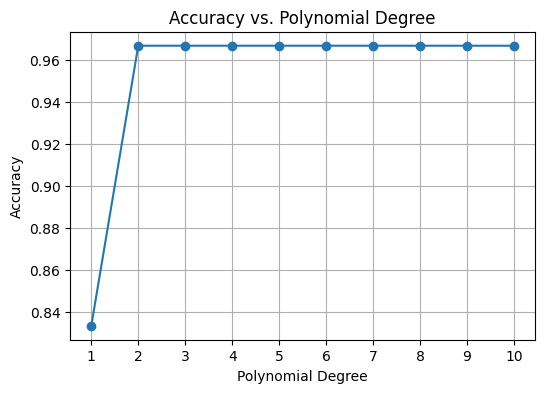

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Training with polynomial degree 1
Degree: 1, Accuracy: 0.8333333333333334
Training with polynomial degree 2
Degree: 2, Accuracy: 0.9666666666666667
Training with polynomial degree 3
Degree: 3, Accuracy: 0.9666666666666667
Training with polynomial degree 4
Degree: 4, Accuracy: 0.9666666666666667
Training with polynomial degree 5
Degree: 5, Accuracy: 0.9666666666666667
Training with polynomial degree 6
Degree: 6, Accuracy: 0.9666666666666667
Training with polynomial degree 7
Degree: 7, Accuracy: 0.9666666666666667
Training with polynomial degree 8
Degree: 8, Accuracy: 0.9666666666666667
Training with polynomial degree 9
Degree: 9, Accuracy: 0.9666666666666667
Training with polynomial degree 10
Degree: 10, Accuracy: 0.9666666666666667


C:\Users\Data\AppData\Local\Temp\ipykernel_4644\3559624952.py:108: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF saved to Google Drive at: svm_polynomial_degrees.gif


d:\ML\HW3\svm_polynomial_degrees.gif

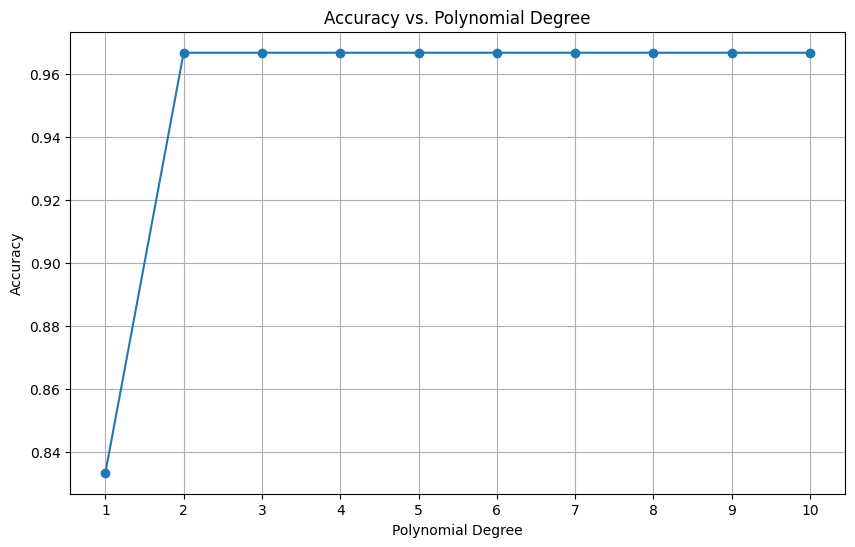

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import imageio
from IPython.display import FileLink

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=44)

# Helper functions for meshgrid and plotting
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def multiclass_svm(X_train, X_test, y_train, C=1.0, kernel_type='poly', poly_params=(1.0, 2)):
    classifiers = []
    predictions = np.zeros((X_test.shape[0], len(np.unique(y_train))))
    for i, class_label in enumerate(np.unique(y_train)):
        y_train_binary = np.where(y_train == class_label, 1, -1)
        clf = SVC(C=C, kernel=kernel_type, degree=poly_params[1], coef0=poly_params[0])
        clf.fit(X_train, y_train_binary)
        classifiers.append(clf)
        predictions[:, i] = clf.decision_function(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes, classifiers

# Custom visualization function for SVM
def visualize_multiclass_classification1(X_train, y_train1, kernel_type, classifiers, class_labels, w_stack, b_stack, epsilon=1e-10, ax=None):
    if ax is None:
        ax = plt.gca()

    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        ax.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            if w_stack[i] is None:
                continue
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            ax.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        # Create a mesh grid
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i, clf in enumerate(classifiers):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            ax.contour(xx, yy, Z, levels=[0], colors='r')

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()
    ax.set_xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    ax.set_ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)

# Train SVM with polynomial kernel of varying degrees and visualize results
image_files = []
accuracies = []

for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, classifiers = multiclass_svm(
        X_train, X_test, y_train, C=1.0, kernel_type='poly', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    # Create mesh grid
    xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])

    # Plot decision boundaries
    fig, ax = plt.subplots(figsize=(10, 8))
    visualize_multiclass_classification1(X_train, y_train, 'poly', classifiers, np.unique(y_train), None, None, ax=ax)
    ax.set_title(f'Degree: {degree}, Accuracy: {accuracy:.2f}')

    filename = f"degree{degree}.png"
    plt.savefig(filename)
    image_files.append(filename)
    plt.close()

# Create a GIF from the saved images
images = []
for filename in image_files:
    images.append(imageio.imread(filename))

gif_path = 'svm_polynomial_degrees.gif'
imageio.mimsave(gif_path, images, duration=2)
print("GIF saved to Google Drive at:", gif_path)
display(FileLink(gif_path))

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


# Q3

## Q3-1

In [1]:

!gdown 1agK7OerZxt8ViPG1dHFf8G_WxqwXsbrR

Downloading...
From (original): https://drive.google.com/uc?id=1agK7OerZxt8ViPG1dHFf8G_WxqwXsbrR
From (redirected): https://drive.google.com/uc?id=1agK7OerZxt8ViPG1dHFf8G_WxqwXsbrR&confirm=t&uuid=1d9c0428-de42-4578-8a66-fd50c8ff1451
To: d:\ML\HW3\creditcardfraud.zip

  0%|          | 0.00/69.2M [00:00<?, ?B/s]
  1%|          | 524k/69.2M [00:03<08:09, 140kB/s]
  2%|▏         | 1.05M/69.2M [00:07<08:13, 138kB/s]
  2%|▏         | 1.57M/69.2M [00:10<07:05, 159kB/s]
  3%|▎         | 2.10M/69.2M [00:12<06:11, 180kB/s]
  4%|▍         | 2.62M/69.2M [00:14<05:21, 207kB/s]
  5%|▍         | 3.15M/69.2M [00:16<05:00, 220kB/s]
  5%|▌         | 3.67M/69.2M [00:18<04:32, 241kB/s]
  6%|▌         | 4.19M/69.2M [00:20<04:22, 248kB/s]
  7%|▋         | 4.72M/69.2M [00:22<04:26, 242kB/s]
  8%|▊         | 5.24M/69.2M [00:24<04:25, 241kB/s]
  8%|▊         | 5.77M/69.2M [00:27<04:48, 220kB/s]
  9%|▉         | 6.29M/69.2M [00:35<08:18, 126kB/s]
 10%|▉         | 6.82M/69.2M [00:37<06:53, 151kB/s]
 11%|█       

In [2]:
from zipfile import ZipFile
ZipFile("creditcardfraud.zip").extractall()

In [5]:
pip install --upgrade scikit-learn imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 262.6 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 262.6 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 262.6 kB/s eta 0:00:01
   ------- ------------------------------- 51.2/258.3 kB 187.0 kB/s eta 0:00:02
   ---------- ---------------------------- 71.7/258.3 kB 245.8 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.3 kB 241.3 kB/s eta 0:00:01
   --------------- ---------------------- 102.4/258.3 kB 267.9 kB/s eta 0:00:01
   ------------------- ------------------ 133.1/258.3 kB 291.2 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/258.3 kB 316.5 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.3 kB 307.2 kB/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
np.random.seed(44)
tf.random.set_seed(44)
df = pd.read_csv(r'creditcard.csv')
del df['Time']

In [2]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


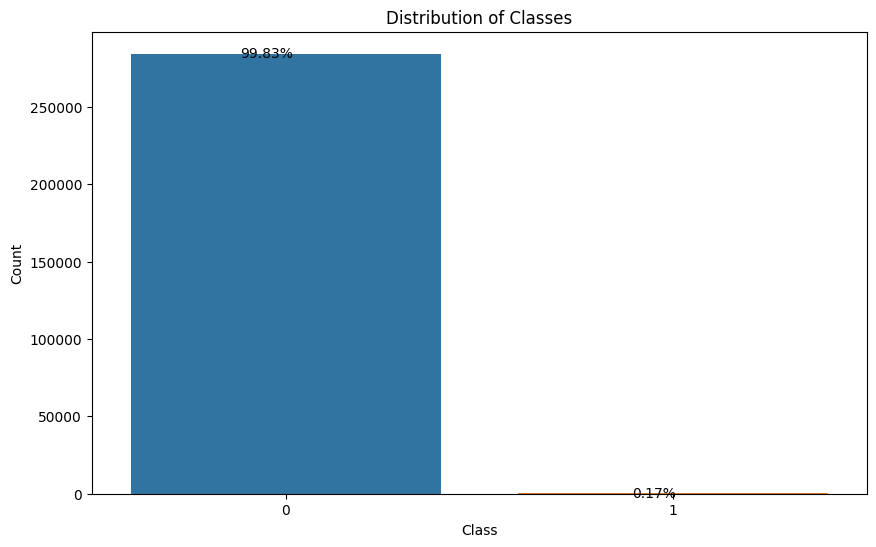

In [3]:
scaler = StandardScaler()
scaler.fit(df[['Amount']])
df['Amount'] = scaler.transform(df[['Amount']])
X = df.drop(['Class'], axis=1)
y = df['Class']
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

In [4]:
y = df['Class']
unique_classes = np.unique(y)
num_classes = len(unique_classes)
print(f"Number of classes: {unique_classes}")
y_categorical = to_categorical(y, num_classes=num_classes)


X_train, X_valid, y_train, y_valid = train_test_split(X, y_categorical, train_size=0.9, random_state=44, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=44, stratify=y_train)
print(y_train.shape, y_test.shape, y_valid.shape)

Number of classes: [0 1]
(205060, 2) (51266, 2) (28481, 2)


In [5]:
train_class_distribution = np.sum(y_train, axis=0)
valid_class_distribution = np.sum(y_valid, axis=0)
test_class_distribution = np.sum(y_test, axis=0)
print("Training set classes: ", train_class_distribution)
print("Testing set classes: ", test_class_distribution)
print("Validation set classes: ", valid_class_distribution)


Training set classes:  [204706.    354.]
Testing set classes:  [51177.    89.]
Validation set classes:  [28432.    49.]


In [10]:
smote = SMOTE(sampling_strategy='minority', random_state=44)
X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
y_train_res = to_categorical(y_train_res, num_classes=2)
np.sum(y_train_res, axis=0)

array([204706., 204706.])

In [11]:

def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train_res)
X_test_noisy = add_noise(X_test)
input_dim = X_train_res.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(22, activation="relu")(encoder)
encoder = Dense(15, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
encoder = Dense(15, activation="relu")(encoder)
encoder = Dense(22, activation="relu")(encoder)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

checkpoint = ModelCheckpoint('best_autoencoder.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

autoencoder.fit(X_train_noisy, X_train_res,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                callbacks=[checkpoint],
                verbose=1)



Epoch 1/20
1588/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.9191
Epoch 1: val_loss improved from inf to 1.12318, saving model to best_autoencoder.keras
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 12.9172 - val_loss: 1.1232
Epoch 2/20
1583/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.6538
Epoch 2: val_loss improved from 1.12318 to 1.10097, saving model to best_autoencoder.keras
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.6531 - val_loss: 1.1010
Epoch 3/20
1591/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.6336
Epoch 3: val_loss improved from 1.10097 to 1.09039, saving model to best_autoencoder.keras
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.6332 - val_loss: 1.0904
Epoch 4/20
1596/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.6227
Epoch 4: val_loss improved from 1.09039 to 1.07933, saving model to best_autoencoder.keras
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.6225 - val_loss: 1.0793
Epoch 5/20
1595/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

In [12]:
autoencoder.load_weights('best_autoencoder.keras')
X_train_denoised = autoencoder.predict(X_train_noisy)
X_test_denoised = autoencoder.predict(X_test_noisy)
classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
classifier_layer = Dense(22, activation="relu")(classifier_layer)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)
classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier_checkpoint = ModelCheckpoint('best_classifier.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
classifier.fit(X_train_denoised, y_train_res,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_test_denoised, y_test),
               callbacks=[classifier_checkpoint],
               verbose=1)

12795/12795 ━━━━━━━━━━━━━━━━━━━━ 11s 846us/step
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
Epoch 1/20
1573/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8780 - loss: 0.4164
Epoch 1: val_loss improved from inf to 0.17757, saving model to best_classifier.keras
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8784 - loss: 0.4146 - val_accuracy: 0.9511 - val_loss: 0.1776
Epoch 2/20
1571/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9103 - loss: 0.2303
Epoch 2: val_loss improved from 0.17757 to 0.17349, saving model to best_classifier.keras
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9103 - loss: 0.2302 - val_accuracy: 0.9528 - val_loss: 0.1735
Epoch 3/20
1577/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9129 - loss: 0.2238
Epoch 3: val_loss improved from 0.17349 to 0.17077, saving model to best_classifier.keras
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9129 - loss: 0.2238 - val_accuracy: 0.9513 - val_loss: 0.1708
Epoch 4/20
1594/1600

# Q3-4

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Loss: 0.522630512714386, Accuracy: 0.849689245223999
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Recall: 0.6938775510204082
[[24166  4266]
 [   15    34]]


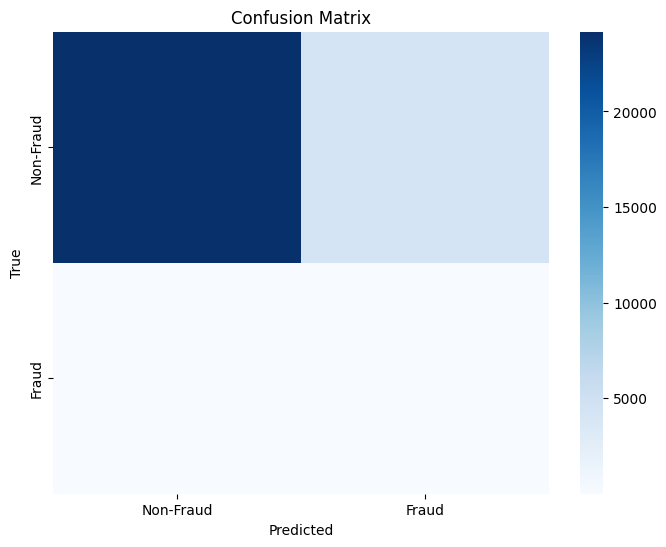

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.85      0.92     28432
       Fraud       0.01      0.69      0.02        49

    accuracy                           0.85     28481
   macro avg       0.50      0.77      0.47     28481
weighted avg       1.00      0.85      0.92     28481



In [15]:
classifier.load_weights('best_classifier.keras')
X_valid_noisy = add_noise(X_valid)
X_valid_denoised = autoencoder.predict(X_valid)

evaluation = classifier.evaluate(X_valid_denoised, y_valid, verbose=0)
print(f'Loss: {evaluation[0]}, Accuracy: {evaluation[1]}')

y_pred = np.argmax(classifier.predict(X_valid_denoised), axis=1)
recall = recall_score(np.argmax(y_valid, axis=1), y_pred)
print(f'Recall: {recall}')
cm = confusion_matrix(np.argmax(y_valid, axis=1), y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(y_valid, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Loss: 0.15202294290065765, Accuracy: 0.9555492997169495
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Recall: 0.8979591836734694
Precision: 0.016838882510524303
F1-score: 0.03305785123966942
[[25863  2569]
 [    5    44]]


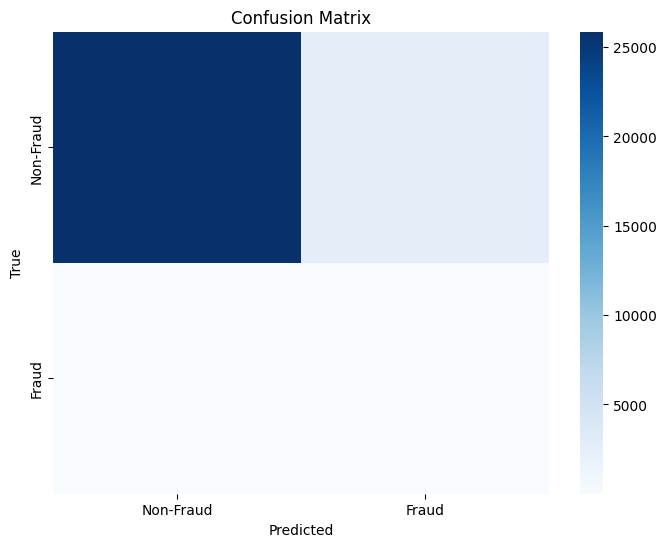

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.91      0.95     28432
       Fraud       0.02      0.90      0.03        49

    accuracy                           0.91     28481
   macro avg       0.51      0.90      0.49     28481
weighted avg       1.00      0.91      0.95     28481



In [17]:
# Evaluate the classifier on the test set
X_valid_noisy = add_noise(X_valid)
X_valid_denoised = autoencoder.predict(X_valid_noisy)

evaluation = classifier.evaluate(X_valid_denoised, y_valid, verbose=0)
print(f'Loss: {evaluation[0]}, Accuracy: {evaluation[1]}')

# Predict probabilities
y_pred_prob = classifier.predict(X_valid_denoised)

# Adjust threshold
threshold = 0.3  # You can adjust this value
y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

# Calculate recall
recall = recall_score(np.argmax(y_valid, axis=1), y_pred)
print(f'Recall: {recall}')

# Calculate precision
precision = precision_score(np.argmax(y_valid, axis=1), y_pred)
print(f'Precision: {precision}')

# Calculate F1-score
f1 = f1_score(np.argmax(y_valid, axis=1), y_pred)
print(f'F1-score: {f1}')

# Plot the confusion matrix
cm = confusion_matrix(np.argmax(y_valid, axis=1), y_pred)
plt.figure(figsize=(8, 6))
print(cm)
sns.heatmap(cm, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(y_valid, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

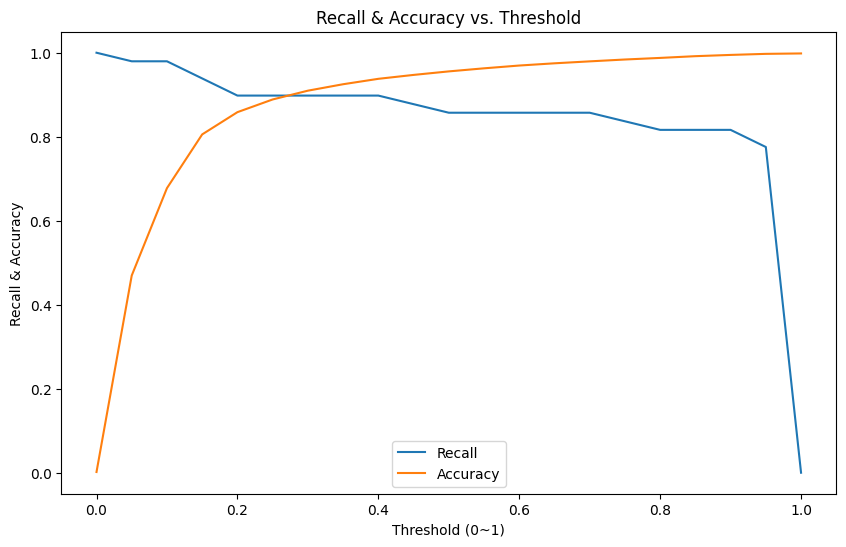

In [19]:
thresholds = np.arange(0.0, 1.05, 0.05)
recalls = []
accuracies = []
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_valid, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Recall & Accuracy')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()

|   Threshold | Recall Rate   | Accuracy   |
|------------:|:--------------|:-----------|
|         0.2 | 89.80%        | 85.85%     |
|         0.3 | 89.80%        | 90.96%     |
|         0.4 | 89.80%        | 93.79%     |
|         0.5 | 85.71%        | 95.55%     |
|         0.6 | 85.71%        | 96.95%     |
|         0.7 | 85.71%        | 97.94%     |
|         0.8 | 81.63%        | 98.76%     |


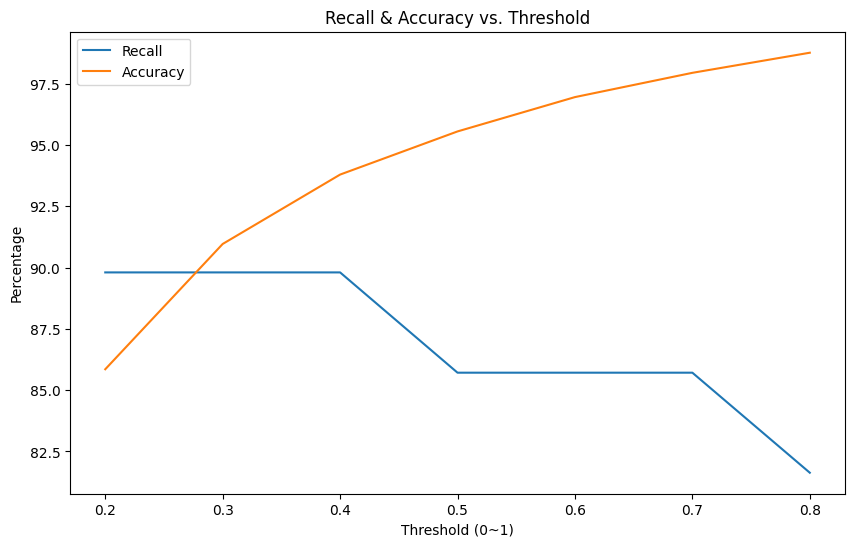

In [20]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

results = []
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_valid, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred)
    results.append({'Threshold': threshold, 'Recall Rate': f'{recall:.2%}', 'Accuracy': f'{accuracy:.2%}'})

results_df = pd.DataFrame(results)

print(results_df.to_markdown(index=False))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, [float(r['Recall Rate'].strip('%')) for r in results], label='Recall')
plt.plot(thresholds, [float(r['Accuracy'].strip('%')) for r in results], label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Percentage')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()

# Q3-5

Resampled dataset shape with strategy 0.1: (225176, 29) (225176, 2)
Epoch 1/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.2785 - val_loss: 1.0587
Epoch 2/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1047 - val_loss: 1.0494
Epoch 3/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0948 - val_loss: 1.0424
Epoch 4/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0835 - val_loss: 1.0300
Epoch 5/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0662 - val_loss: 1.0078
Epoch 6/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0484 - val_loss: 1.0036
Epoch 7/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0442 - val_loss: 0.9996
Epoch 8/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0394 - val_loss: 0.9938
Epoch 9/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0353 - val_loss: 0.9908
Epoch 10/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0318 - val_loss: 0.9889
Epoch 11/20
880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0301 - v

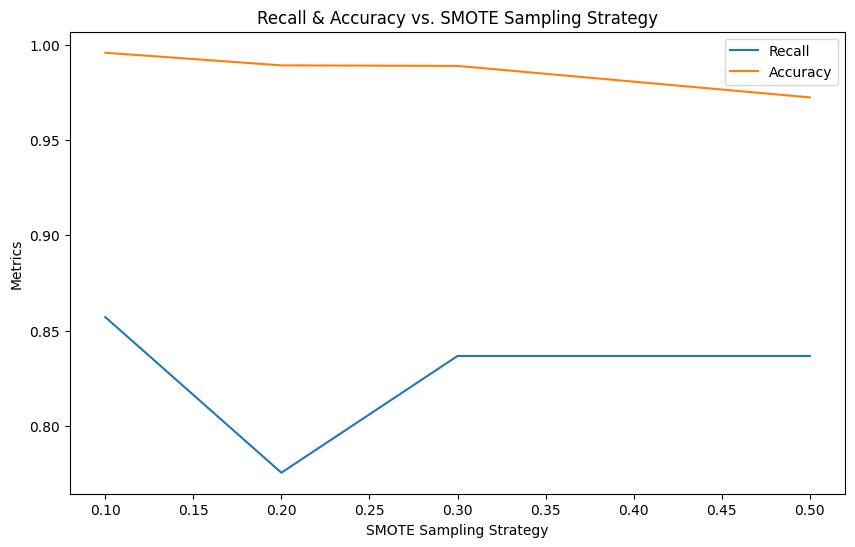

In [21]:
sampling_strategies = [0.1, 0.2, 0.3, 0.5]

results = []

for strategy in sampling_strategies:
    # Apply SMOTE with the current sampling strategy
    smote = SMOTE(sampling_strategy=strategy, random_state=44)
    X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
    y_train_res = to_categorical(y_train_res, num_classes=2)

    print(f'Resampled dataset shape with strategy {strategy}:', X_train_res.shape, y_train_res.shape)

    # Adding Gaussian noise to the data
    def add_noise(data, noise_factor=0.2):
        noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
        noisy_data = np.clip(noisy_data, 0., 1.)
        return noisy_data

    X_train_noisy = add_noise(X_train_res)
    X_test_noisy = add_noise(X_test)

    # Define the autoencoder model
    input_dim = X_train_res.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(22, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(22, activation="relu")(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(X_train_noisy, X_train_res,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_test_noisy, X_test),
                    verbose=1)

    # Denoise the data
    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    # Define the classifier model
    classifier_input = Input(shape=(input_dim,))
    classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
    classifier_layer = Dense(22, activation="relu")(classifier_layer)
    classifier_layer = Dense(15, activation="relu")(classifier_layer)
    classifier_layer = Dense(10, activation="relu")(classifier_layer)
    classifier_layer = Dense(5, activation="relu")(classifier_layer)
    classifier_layer = Dense(2, activation='softmax')(classifier_layer)  # Two neurons with softmax activation

    classifier = Model(inputs=classifier_input, outputs=classifier_layer)
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical crossentropy loss

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_res,
                   epochs=20,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(X_test_denoised, y_test),
                   verbose=1)

    # Evaluate the classifier on the test set
    X_valid_noisy = add_noise(X_valid)
    X_valid_denoised = autoencoder.predict(X_valid_noisy)

    # Predict probabilities
    y_pred_prob = classifier.predict(X_valid_denoised)

    # Define a fixed threshold for classification
    threshold = 0.5
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_valid, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_valid, axis=1), y_pred)
    results.append({'SMOTE Threshold': strategy, 'Recall Rate': recall, 'Accuracy': accuracy})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot recall and accuracy against SMOTE sampling strategies
plt.figure(figsize=(10, 6))
plt.plot(results_df['SMOTE Threshold'], results_df['Recall Rate'], label='Recall')
plt.plot(results_df['SMOTE Threshold'], results_df['Accuracy'], label='Accuracy')
plt.xlabel('SMOTE Sampling Strategy')
plt.ylabel('Metrics')
plt.title('Recall & Accuracy vs. SMOTE Sampling Strategy')
plt.legend()
plt.show()

# Q3-6

(170884, 2) (56961, 2) (56962, 2)
Epoch 1/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.1405 - val_accuracy: 0.9983 - val_loss: 0.0079
Epoch 2/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9981 - loss: 0.0067 - val_accuracy: 0.9985 - val_loss: 0.0057
Epoch 3/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9990 - loss: 0.0046 - val_accuracy: 0.9992 - val_loss: 0.0052
Epoch 4/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9992 - val_loss: 0.0050
Epoch 5/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9993 - val_loss: 0.0049
Epoch 6/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0048
Epoch 7/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0048
Epoch 8/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994

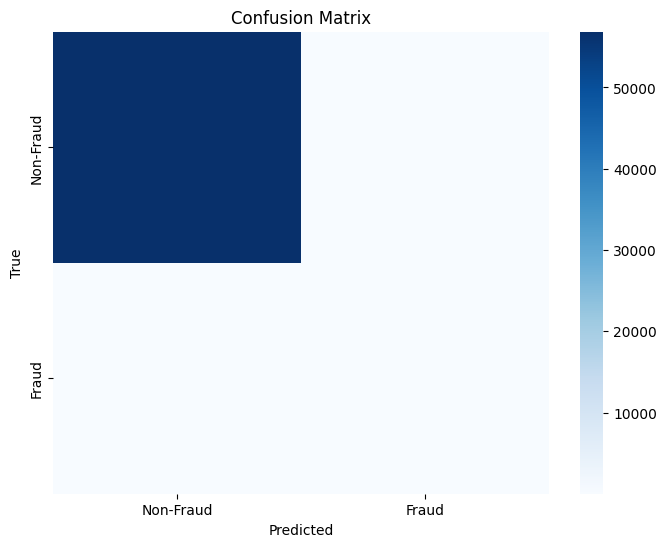

In [22]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

X = data.drop(['Class'], axis=1)
y = data['Class']


y_categorical = to_categorical(y, num_classes=2)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, train_size=0.6, random_state=44, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=44, stratify=np.argmax(y_temp, axis=1))
print (y_train.shape, y_valid.shape, y_test.shape)
def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train)
X_valid_noisy = add_noise(X_valid)
X_test_noisy = add_noise(X_test)
# Define the classifier model
input_dim = X_train.shape[1]

classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
classifier_layer = Dense(22, activation="relu")(classifier_layer)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier.fit(X_train_noisy, y_train,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_valid_noisy, y_valid),
               verbose=1)

# Evaluate the classifier on the test set
y_pred_prob = classifier.predict(X_test_noisy)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate performance metrics
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Print classification report
print(f'Classification Report (Unbalanced Data with Noise Added):\n')
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

# Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", cm)

# Print accuracy and recall
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()